In [101]:
#importing all required liabraries

#for pre - Processing tools to access datset
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#pre-processing tools
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV


#Algo.
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression

#Metrics for Evolution
from sklearn.metrics import r2_score


#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif,SelectFromModel

#ensemblib techniques,A
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.ensemble import BaggingClassifier

#warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
#Access database of train and test data from storage
test = pd.read_csv(r"test.csv")

In [103]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [104]:
with pd.option_context("display.max_rows",80):display(test.isnull().sum())

#test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

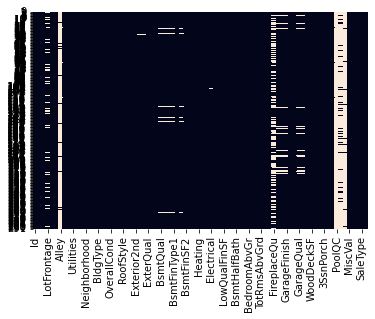

In [105]:
sns.heatmap(test.isnull(),yticklabels=True,cbar=False)

In [106]:
df=test.copy()

In [107]:
#missing value analysis

for i in df.columns:
  print(i,"--",np.round(df[i].isnull().mean()*100),"% missing values")


Id -- 0.0 % missing values
MSSubClass -- 0.0 % missing values
MSZoning -- 0.0 % missing values
LotFrontage -- 15.0 % missing values
LotArea -- 0.0 % missing values
Street -- 0.0 % missing values
Alley -- 95.0 % missing values
LotShape -- 0.0 % missing values
LandContour -- 0.0 % missing values
Utilities -- 0.0 % missing values
LotConfig -- 0.0 % missing values
LandSlope -- 0.0 % missing values
Neighborhood -- 0.0 % missing values
Condition1 -- 0.0 % missing values
Condition2 -- 0.0 % missing values
BldgType -- 0.0 % missing values
HouseStyle -- 0.0 % missing values
OverallQual -- 0.0 % missing values
OverallCond -- 0.0 % missing values
YearBuilt -- 0.0 % missing values
YearRemodAdd -- 0.0 % missing values
RoofStyle -- 0.0 % missing values
RoofMatl -- 0.0 % missing values
Exterior1st -- 0.0 % missing values
Exterior2nd -- 0.0 % missing values
MasVnrType -- 0.0 % missing values
MasVnrArea -- 0.0 % missing values
ExterQual -- 0.0 % missing values
ExterCond -- 0.0 % missing values
Foundati

In [108]:
for i in df.columns:
  if (np.round(df[i].isnull().mean()*100))>1:
    print(i,"---",np.round(df[i].isnull().mean()*100))

LotFrontage --- 15.0
Alley --- 95.0
BsmtQual --- 2.0
BsmtCond --- 2.0
BsmtExposure --- 2.0
BsmtFinType1 --- 2.0
BsmtFinType2 --- 2.0
FireplaceQu --- 48.0
GarageType --- 6.0
GarageYrBlt --- 6.0
GarageFinish --- 6.0
GarageQual --- 6.0
GarageCond --- 6.0
PoolQC --- 100.0
Fence --- 85.0
MiscFeature --- 97.0


In [109]:
col = [i for i in df.columns if (np.round(df[i].isnull().mean()*100))>=80]

print(col)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [110]:
df.drop(col,axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
print(test.shape)
print(df.shape)

(292, 80)
(292, 75)


In [111]:
#Fill NA values

#Numerical features 
#list of numerical features
num_feature = [i for i in df.columns if df[i].dtypes!='object']

print('Number of numerical variables :- ' , len(num_feature))

with pd.option_context("display.max_columns",len(num_feature)):display(df[num_feature].head(10))

Number of numerical variables :-  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,86.0,14157,9,5,2005,2006,200.0,1249,0,673,1922,1922,0,0,1922,1,0,2,0,3,1,8,1,2005.0,3,676,178,51,0,0,0,0,0,7,2007
1,120,NaN,5814,8,5,1984,1984,0.0,1036,0,184,1220,1360,0,0,1360,1,0,1,0,1,1,4,1,1984.0,2,565,63,0,0,0,0,0,0,8,2009
2,20,NaN,11838,8,5,2001,2001,0.0,0,0,1753,1753,1788,0,0,1788,0,0,2,0,3,1,7,1,2001.0,2,522,202,151,0,0,0,0,0,6,2009
3,70,75.0,12000,7,7,1941,1950,0.0,275,0,429,704,860,704,0,1564,0,0,1,1,3,1,7,1,1941.0,1,234,0,0,0,0,0,0,0,7,2009
4,60,86.0,14598,6,5,2007,2007,74.0,0,0,894,894,894,1039,0,1933,0,0,2,1,4,1,9,1,2007.0,3,668,100,18,0,0,0,0,0,1,2008
5,180,21.0,1936,4,6,1970,1970,0.0,131,499,0,630,630,0,0,630,1,0,1,0,1,1,3,0,NaN,0,0,0,0,0,0,0,0,0,12,2007
6,180,35.0,3675,5,5,2005,2005,80.0,547,0,0,547,1072,0,0,1072,1,0,1,0,2,1,5,0,2005.0,2,525,0,28,0,0,0,0,0,5,2006
7,20,107.0,13891,8,5,2007,2008,436.0,1400,0,310,1710,1710,0,0,1710,1,0,2,0,2,1,6,1,2007.0,3,866,0,102,0,0,0,0,0,1,2008
8,80,NaN,12800,7,5,1989,1989,145.0,1518,0,0,1518,1644,0,0,1644,1,1,2,0,2,1,5,1,1989.0,2,569,80,0,0,0,396,0,0,8,2009
9,120,32.0,4500,6,5,1998,1998,320.0,866,0,338,1204,1204,0,0,1204,1,0,2,0,2,1,5,0,1998.0,2,412,0,247,0,0,0,0,0,6,2009


In [112]:
#list of variables that contain year info.

year_col = [i for i in df.columns if 'Yr' in i or 'Year' in i]

year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [113]:
#Diecrete Features

Disc_var = [i for i in num_feature if df[i].nunique()<25 and i not in year_col ]

print("Total no. of Discrete feature in Dataset are {}".format(len(Disc_var)))

Total no. of Discrete feature in Dataset are 18


In [114]:
#Continuous features

cont_var = [i for i in num_feature if i not in Disc_var+year_col]

print("Total no. of Continuous feature in Dataset are {}".format(len(cont_var)))

Total no. of Continuous feature in Dataset are 14


In [115]:
num_nan = [i for i in cont_var if (df[i].isnull().sum())>=1]

num_nan

['LotFrontage', 'MasVnrArea']

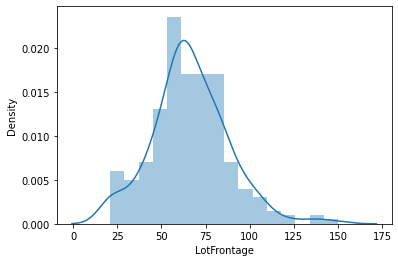

In [116]:
sns.distplot(df['LotFrontage'])

In [117]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [118]:
data=df.copy()

In [119]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [120]:
#Categorical fetaures which have NAN value

na_feature = [i for i in df.columns if df[i].isnull().sum()>=1 if df[i].dtypes=='O']

for i in na_feature:
  print(i,"--",df[i].isnull().sum())

MasVnrType -- 1
BsmtQual -- 7
BsmtCond -- 7
BsmtExposure -- 7
BsmtFinType1 -- 7
BsmtFinType2 -- 7
Electrical -- 1
FireplaceQu -- 139
GarageType -- 17
GarageFinish -- 17
GarageQual -- 17
GarageCond -- 17


In [121]:
#fill categorical features NaN value with there respective column mode.

for i in na_feature:
  df[i]=df[i].fillna(df[i].mode()[0])

for i in na_feature:
  print(i,"--",df[i].isnull().sum())

MasVnrType -- 0
BsmtQual -- 0
BsmtCond -- 0
BsmtExposure -- 0
BsmtFinType1 -- 0
BsmtFinType2 -- 0
Electrical -- 0
FireplaceQu -- 0
GarageType -- 0
GarageFinish -- 0
GarageQual -- 0
GarageCond -- 0


In [122]:
#Year fetaures which have NAN value

for i in year_col:
  print(i,"--",df[i].isnull().sum())

YearBuilt -- 0
YearRemodAdd -- 0
GarageYrBlt -- 17
YrSold -- 0


In [123]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [124]:
df['GarageYrBlt'].isnull().sum()

0

In [125]:
for i in Disc_var:
  print(i,"---",df[i].isnull().sum())

MSSubClass --- 0
OverallQual --- 0
OverallCond --- 0
LowQualFinSF --- 0
BsmtFullBath --- 0
BsmtHalfBath --- 0
FullBath --- 0
HalfBath --- 0
BedroomAbvGr --- 0
KitchenAbvGr --- 0
TotRmsAbvGrd --- 0
Fireplaces --- 0
GarageCars --- 0
3SsnPorch --- 0
ScreenPorch --- 0
PoolArea --- 0
MiscVal --- 0
MoSold --- 0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [127]:
df.shape

(292, 75)

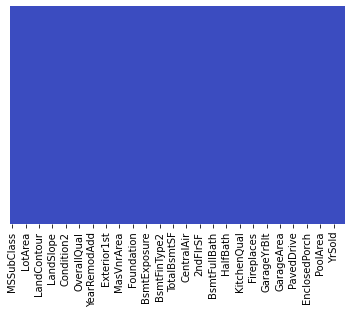

In [128]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [129]:
for i in cont_var:
  print(i,"--",df[i].min(),"---",df[i].skew())

LotFrontage -- 21.0 --- 0.4668125804769121
LotArea -- 1526 --- 12.781804878159509
MasVnrArea -- 0.0 --- 1.9768035158015216
BsmtFinSF1 -- 0 --- 0.7397900302275427
BsmtFinSF2 -- 0 --- 3.6985428489206353
BsmtUnfSF -- 0 --- 0.9607084339804762
TotalBsmtSF -- 0 --- 0.5192570474465444
1stFlrSF -- 372 --- 0.6920473619398531
2ndFlrSF -- 0 --- 0.7655108901822798
GrLivArea -- 520 --- 1.0105863611717616
GarageArea -- 0 --- 0.13354700925902785
WoodDeckSF -- 0 --- 1.7082210806611646
OpenPorchSF -- 0 --- 2.1850302993668924
EnclosedPorch -- 0 --- 3.1770459354530813


In [130]:
pt =['LotArea','1stFlrSF','GrLivArea','ScreenPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','MasVnrArea']

In [131]:
#Removing the otliers by using power transformation
power = PowerTransformer()
for i in pt:
  power = PowerTransformer(method = 'yeo-johnson', standardize=True)
  df[i] = pd.DataFrame(power.fit_transform(df[[i]]))
  
df['LotFrontage']=np.log(df['LotFrontage'])
df['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])

In [132]:
for i in cont_var:
  print(i,"-----",data[i].skew())

LotFrontage ----- 0.4668125804769121
LotArea ----- 12.781804878159509
MasVnrArea ----- 1.9734507929252854
BsmtFinSF1 ----- 0.7397900302275427
BsmtFinSF2 ----- 3.6985428489206353
BsmtUnfSF ----- 0.9607084339804762
TotalBsmtSF ----- 0.5192570474465444
1stFlrSF ----- 0.6920473619398531
2ndFlrSF ----- 0.7655108901822798
GrLivArea ----- 1.0105863611717616
GarageArea ----- 0.13354700925902785
WoodDeckSF ----- 1.7082210806611646
OpenPorchSF ----- 2.1850302993668924
EnclosedPorch ----- 3.1770459354530813


In [133]:
for i in cont_var:
  print(i,"-----",df[i].skew())

LotFrontage ----- -1.1525739339888452
LotArea ----- 0.0031107760225678677
MasVnrArea ----- 0.36325340026878816
BsmtFinSF1 ----- -0.1076640129644059
BsmtFinSF2 ----- 2.570198610917897
BsmtUnfSF ----- -0.23209911808931835
TotalBsmtSF ----- -0.037982208813810495
1stFlrSF ----- -0.0005481281817284476
2ndFlrSF ----- 0.7655108901822798
GrLivArea ----- -0.00030660402188274267
GarageArea ----- 0.13354700925902785
WoodDeckSF ----- 0.21010239049342752
OpenPorchSF ----- -0.05895079491868486
EnclosedPorch ----- 2.165534691365085


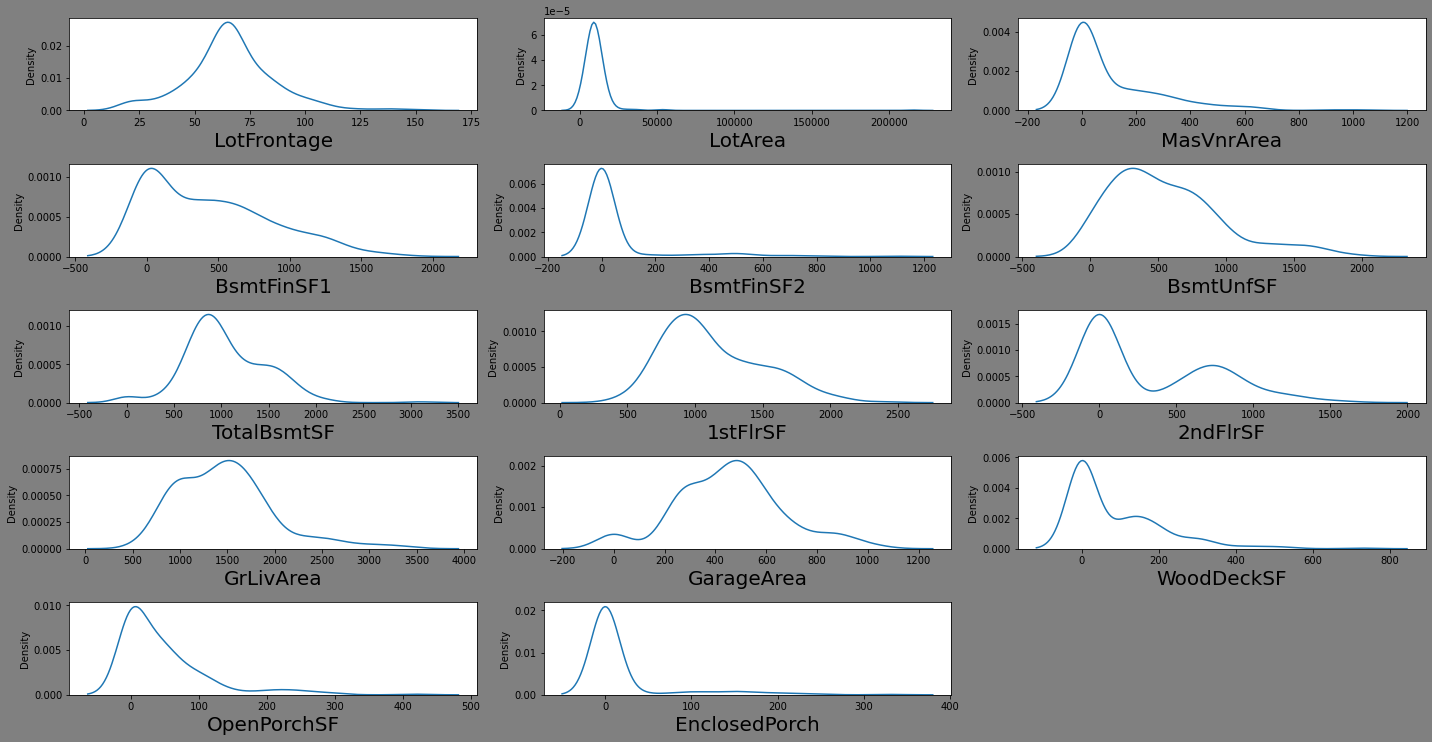

In [134]:
#let see how data is distribute in every Continuous column

plt.figure(figsize=(20,20),facecolor="grey")
plotnumber=1

for i in cont_var:
    if plotnumber<=18:
        ax=plt.subplot(10,3,plotnumber)
        sns.kdeplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

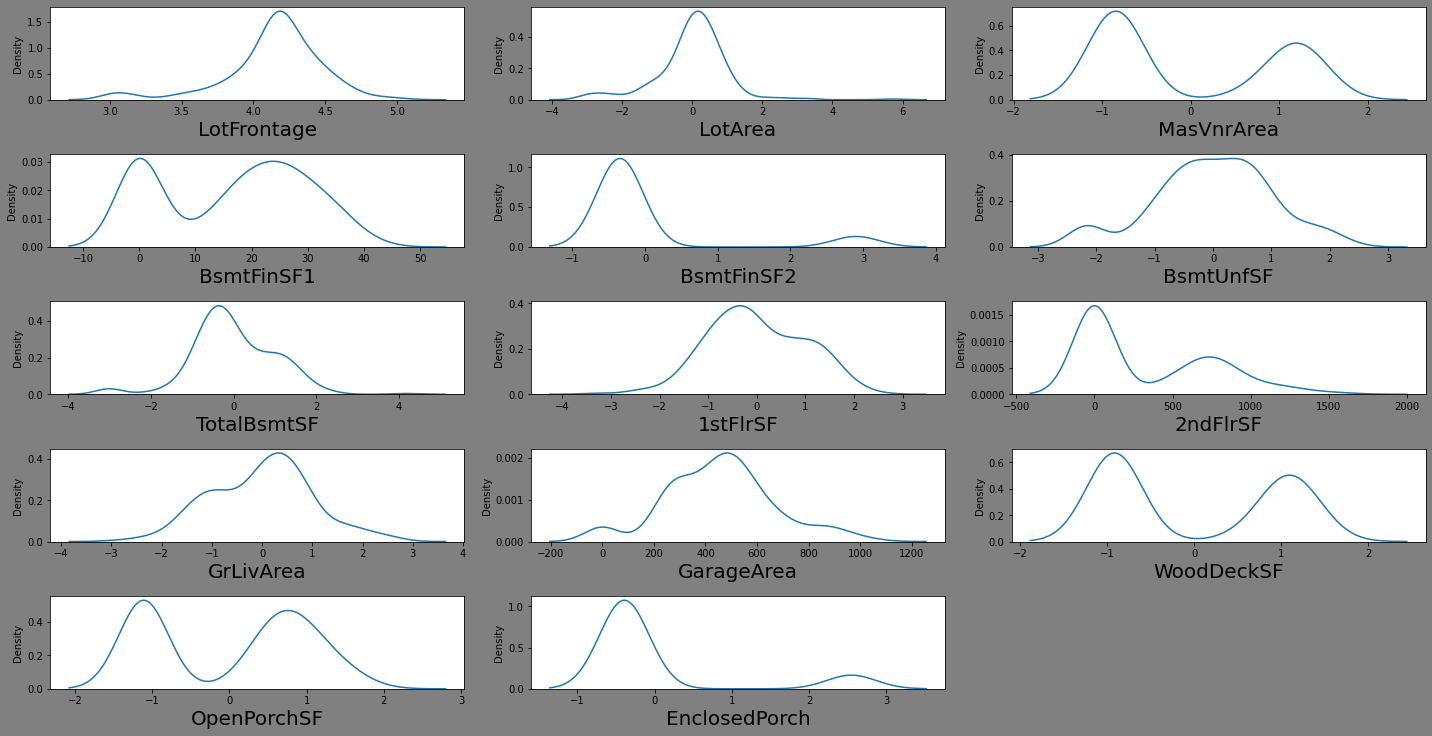

In [135]:
#let see how data is distribute in every Continuous column

plt.figure(figsize=(20,20),facecolor="grey")
plotnumber=1

for i in cont_var:
    if plotnumber<=18:
        ax=plt.subplot(10,3,plotnumber)
        sns.kdeplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [136]:
fgh

NameError: ignored

In [137]:
df.to_csv('new_test.csv',index=False)